In [1]:
import rosbag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
bag = rosbag.Bag('../bag/run1.bag')

In [3]:
topic = '/car1/rc_cmd/steer'
df = pd.DataFrame(columns=['data'])

i = 0
for topic, msg, t in bag.read_messages(topics=[topic]):
    data = msg.data
    df = df.append({'data': data}, ignore_index=True)
    i += 1

In [4]:
t_df = df
t_df

,data
0,1500
1,1500
2,1500
3,1500
4,1500
...,...
4318,1528
4319,1532
4320,1536
4321,1536


<AxesSubplot:>

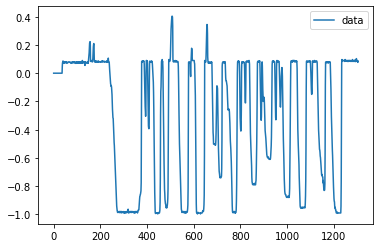

In [26]:
t_df = df
t_df = t_df.astype(float)
t_df = t_df.groupby(df.index // 3.312).mean()

t_df = ((t_df - 1500) / 400)[:21305]
t_df.plot()

In [23]:
t_df = t_df.round(4)
t_df.to_csv('train_steer.csv', index=False)

In [60]:
mdf = pd.read_csv('color_test_steer.csv')

In [61]:
len(mdf)

5427

<AxesSubplot:>

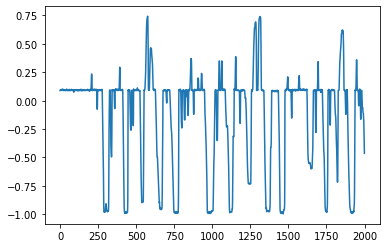

In [43]:
mdf.data[:2000].plot()